In [22]:
import cobra
import seaborn as sns
from tqdm import tqdm
import straindesign as sd
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

In [3]:
ich360= cobra.io.read_sbml_model('../../Model/iCH360/Escherichia_coli_iCH360.xml')
ich360_red= cobra.io.read_sbml_model('../../Model/iCH360red/iCH360red.xml')

'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.


In [6]:
ich360_metabolic_reactions=[r for r in ich360.reactions if r not in ich360.boundary]
ich360_red_metabolic_reactions=[r for r in ich360_red.reactions if r not in ich360_red.boundary]

In [8]:
print(f'metabolic Reaction_count: iCH360: {len(ich360_metabolic_reactions)} iCH360red: {len(ich360_red_metabolic_reactions)}')

metabolic Reaction_count: iCH360: 323 iCH360red: 305


In [20]:
%%capture
models=[ich360,ich360_red]
model_names=['iCH360','iCH360red']
biomass_rxns_id={'iCH360':'Biomass','iCH360red':'Biomass'}



products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
conditions=['aerobic','anaerobic']
envelopes={model_name:{
                     condition: {product:0 
                                for product in products 
                                }
                     for condition in conditions
                    } 
        for model_name in model_names}

for i,model in (enumerate(models)):
    model_name=model_names[i]
    for condition in conditions:
        for product in tqdm(products):
            if condition=='anaerobic':
                dp,tr,plot=sd.plot_flux_space(model,(biomass_rxns_id[model_name],product),constraints=['EX_o2_e=0'],show=False)
            else:
                dp,tr,plot=sd.plot_flux_space(model,(biomass_rxns_id[model_name],product),show=False)
            envelopes[model_name][condition][product]=(dp,tr,plot)


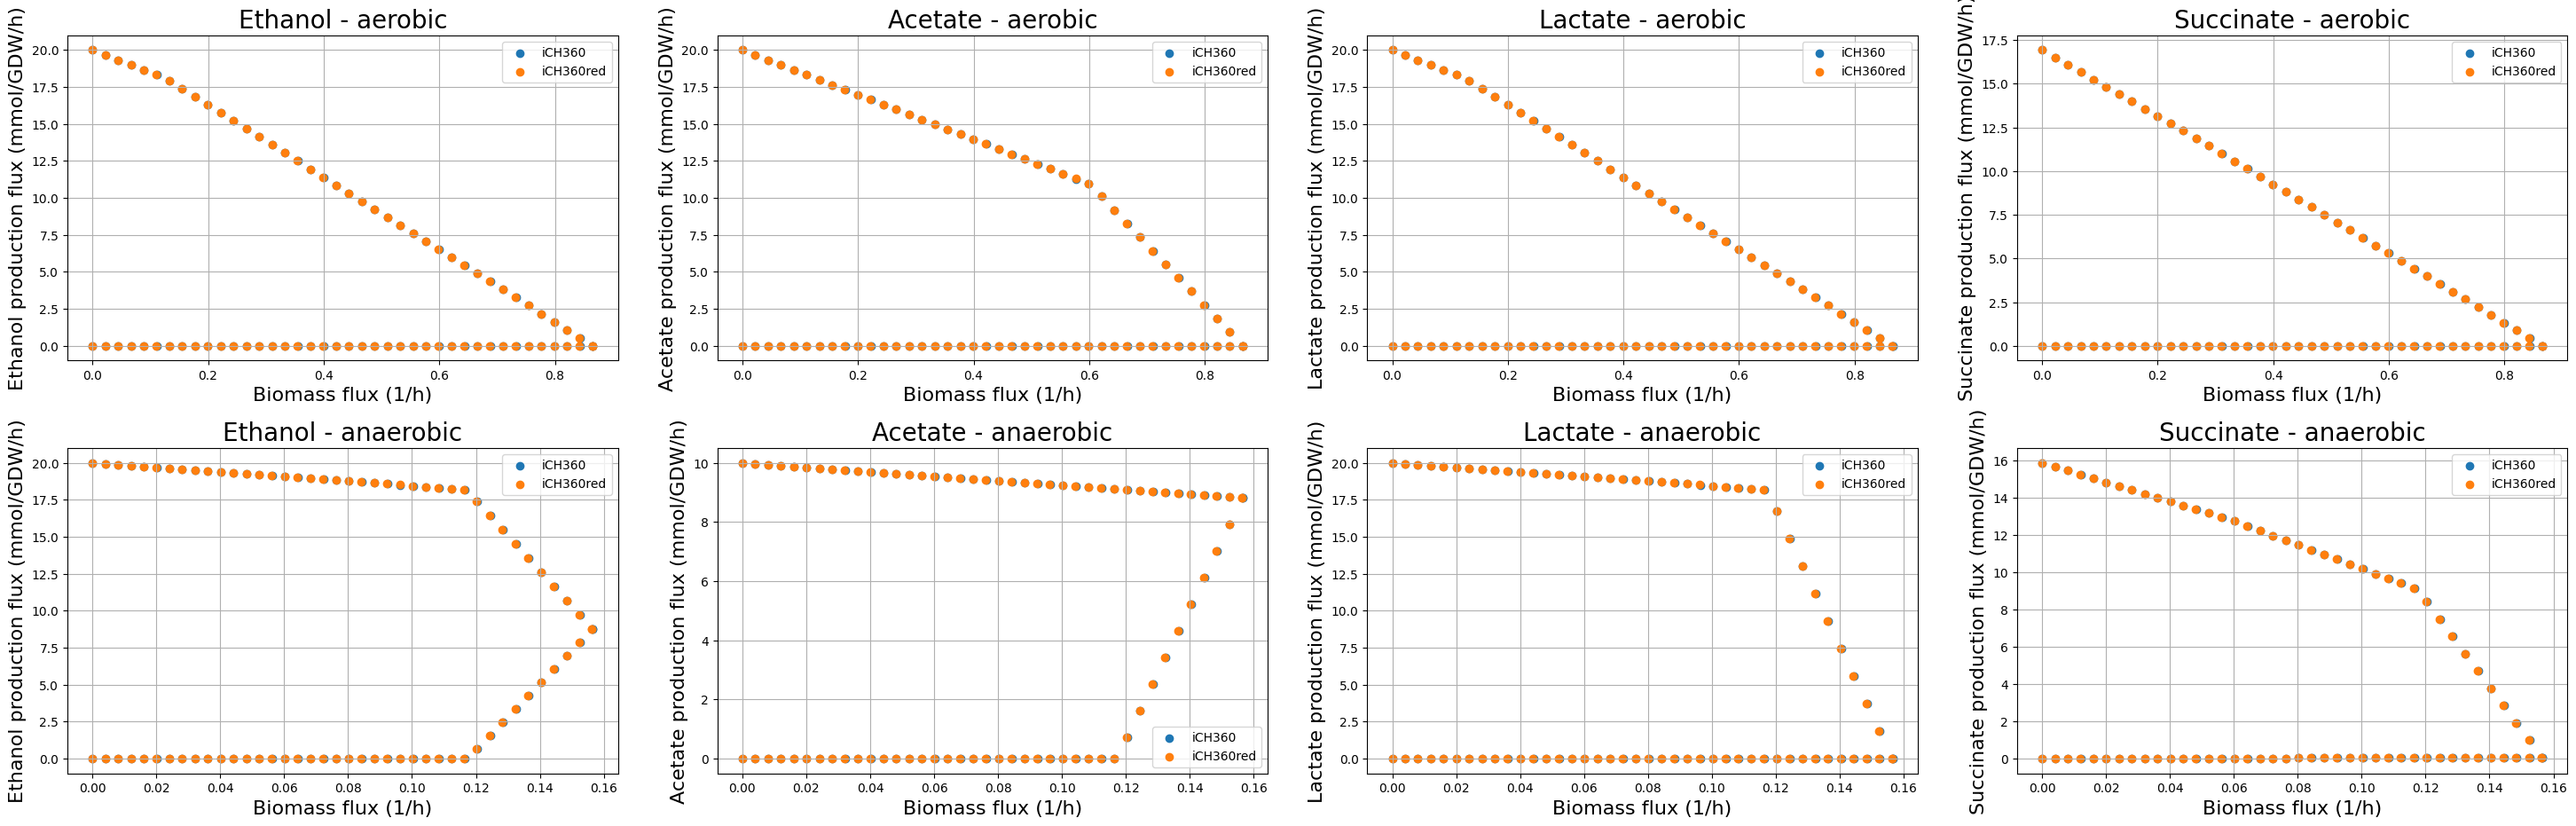

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [23]:
fig,ax=plt.subplots(len(conditions),len(products),figsize=(30,10))
plt.tight_layout(pad=5)
product_names=['Ethanol','Acetate','Lactate','Succinate']
for i,condition in enumerate(conditions):
    for j,product in enumerate(products):
        for k,model_name in enumerate(model_names):
            cur_envelope=np.array(envelopes[model_name][condition][product][0])
            ax[i,j].scatter(cur_envelope[:,0],cur_envelope[:,1])
            ax[i,j].set_title(product_names[j]+' - '+condition,fontsize=20)
            ax[i,j].set_xlabel('Biomass flux (1/h)',fontsize=16)
            ax[i,j].set_ylabel(product_names[j]+' production flux (mmol/GDW/h)',fontsize=16)
            ax[i,j].legend(model_names)
        ax[i,j].grid()

plt.show()
fig.savefig('../figures/ich360_vs_ich360red_production_envelope_glucose.eps',dpi=300)